In [1]:
import flybrains

In [2]:
# This is the Janelia "hemibrain" template brain
flybrains.JRCFIB2018F

Template brain
--------------
Name: JRCFIB2018F
Short Name: JRCFIB2018F
Type: None
Sex:  None
Dimensions: NA
Voxel size:
  x = 0.008 m
  y = 0.008 i
  z = 0.008 c
Bounding box (m):
  NA
Description: Calibrated version of Janelia FIB hemibrain dataset
DOI: https://doi.org/10.1101/2020.01.21.911859

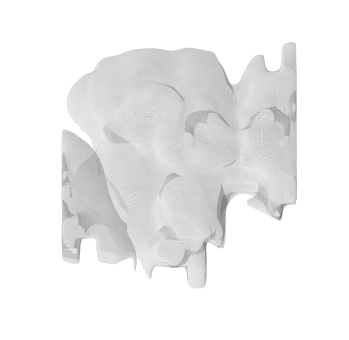

In [10]:
import navis

# This is the hemibrain neuropil surface mesh
fig, ax = navis.plot2d(flybrains.JRCFIB2018F)
ax.azim, ax.elev = -90, 180

In [33]:
navis.transforms.registry.summary()

,source,target,transform,type,invertible,weight
0,IBNWB,JFRC2,CMTKtransform with 1 transform(s),bridging,True,1
1,JFRC2013,JFRC2013DS,CMTKtransform with 1 transform(s),bridging,True,1
2,JFRC2013DS,JFRC2013,CMTKtransform with 1 transform(s),bridging,True,1
3,JFRC2014,JFRC2013,CMTKtransform with 1 transform(s),bridging,True,1
4,JFRC2,T1,CMTKtransform with 1 transform(s),bridging,True,1
...,...,...,...,...,...,...
97,JRCFIB2018Fraw,JRCFIB2018F,<navis.transforms.affine.AffineTransform objec...,bridging,True,1
98,JRCFIB2018F,JRCFIB2018Fum,<navis.transforms.affine.AffineTransform objec...,bridging,True,1
99,FAFB14um,FAFB14,<navis.transforms.affine.AffineTransform objec...,bridging,True,1
100,FAFB,FAFB14,<navis.transforms.base.AliasTransform object a...,bridging,True,1


In [4]:
# Load the example hemibrain neurons (JRCFIB2018raw space)
nl = navis.example_neurons()
nl

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,1734350788,1734350788,4465,None,603,None,266458.0000,[4176],8 nanometer
1,navis.TreeNeuron,1734350908,1734350908,4845,None,733,None,304277.0000,[6],8 nanometer
2,navis.TreeNeuron,722817260,722817260,4336,None,635,None,274910.5625,None,8 nanometer
3,navis.TreeNeuron,754534424,754534424,4702,None,697,None,286743.0000,[4],8 nanometer
4,navis.TreeNeuron,754538881,754538881,4890,None,626,None,291435.0000,[703],8 nanometer


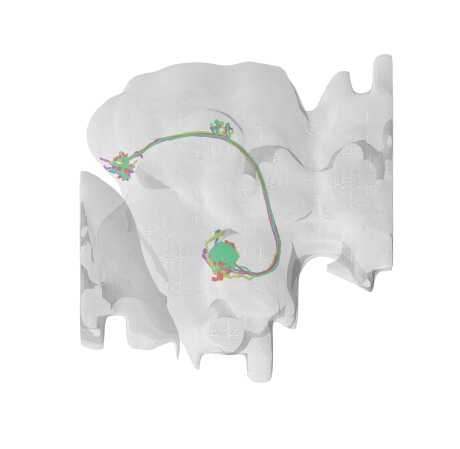

In [27]:
fig, ax = navis.plot2d([nl, flybrains.JRCFIB2018Fraw], linewidth=2, figsize=(8, 8))
ax.azim, ax.elev = -90, 180

In [11]:
xf = navis.xform_brain(nl, source='JRCFIB2018Fraw', target='JRC2018F')

Transform path: JRCFIB2018Fraw->JRCFIB2018F->JRCFIB2018Fum->JRC2018F


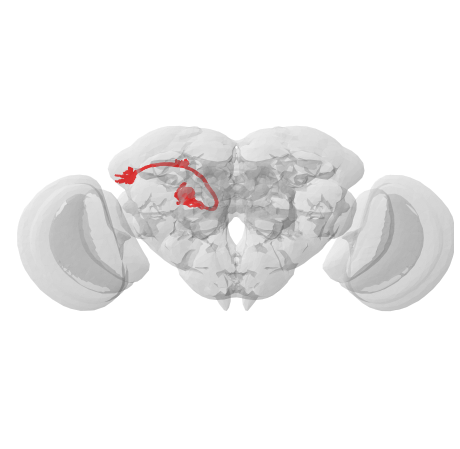

In [15]:
# Plot the transformed neurons and the JRC2018F template brain
fig, ax = navis.plot2d([xf, flybrains.JRC2018F], linewidth=2, color='r', figsize=(8, 8))
ax.azim, ax.elev = -90, -90
ax.dist = 5

In [13]:
mirrored = navis.mirror_brain(xf, template='JRC2018F')

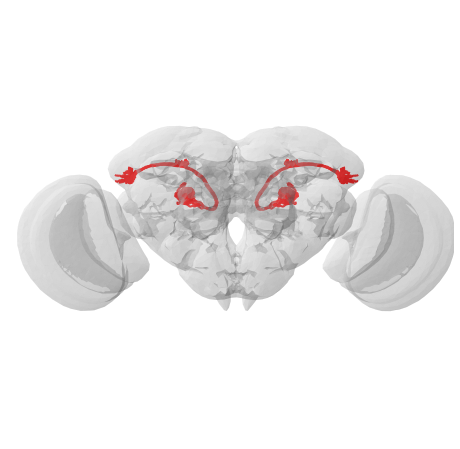

In [14]:
fig, ax = navis.plot2d([xf, mirrored, flybrains.JRC2018F], linewidth=2, color='r', figsize=(8, 8))
ax.azim, ax.elev = -90, -90
ax.dist = 5

In [17]:
import pandas as pd

# These landmarks map betweet FAFB (v14 and v13) and a light level template
# We will use only the v13 and v14 landmarks
landmarks_v14 = pd.read_csv('https://github.com/saalfeldlab/elm/raw/master/lm-em-landmarks_v14.csv', header=None)
landmarks_v13 = pd.read_csv('https://github.com/saalfeldlab/elm/raw/master/lm-em-landmarks_v13.csv', header=None)

# Name the columns
landmarks_v14.columns = landmarks_v13.columns = ["label", "use", "lm_x","lm_y","lm_z", "fafb_x","fafb_y","fafb_z"]

landmarks_v13.head()

,label,use,lm_x,lm_y,lm_z,fafb_x,fafb_y,fafb_z
0,Pt-1,True,571.400083,38.859963,287.059544,525666.465856,172470.413167,80994.733289
1,Pt-2,True,715.811344,213.299356,217.393493,595391.597008,263523.121958,84156.773677
2,Pt-3,True,513.002196,198.001970,217.794090,501716.347872,253223.667163,98413.701578
3,Pt-6,True,867.012542,31.919253,276.223437,670999.903156,179097.916778,67561.691416
4,Pt-7,True,935.210895,234.229522,351.518068,702703.909963,251846.384054,127865.886146


In [18]:
from navis.transforms.thinplate import TPStransform

tr = TPStransform(landmarks_source=landmarks_v14[["fafb_x","fafb_y","fafb_z"]].values,
                  landmarks_target=landmarks_v13[["fafb_x","fafb_y","fafb_z"]].values)

# navis.transforms.MovingLeastSquaresTransform has similar properties

In [19]:
# Transform our neurons into FAFB 14 space
xf_fafb14 = navis.xform_brain(nl, source='JRCFIB2018Fraw', target='FAFB14')

Transform path: JRCFIB2018Fraw->JRCFIB2018F->JRCFIB2018Fum->JRC2018F->FAFB14um->FAFB14


In [20]:
# Transform the nodes of the first two neurons 
pts_v14 = xf_fafb14[:2].nodes[['x', 'y', 'z']].values

# The actual transform
pts_v13 = tr.xform(pts_v14)

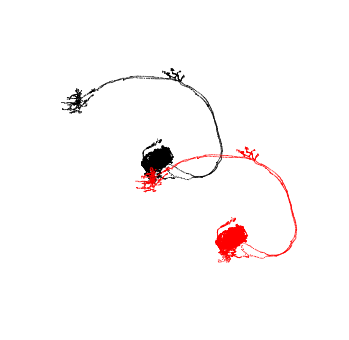

In [21]:
fig, ax = navis.plot2d(pts_v14, scatter_kws=dict(c='k'))
_ = navis.plot2d(pts_v13, scatter_kws=dict(c='r'), ax=ax)
ax.azim = ax.elev = -90

In [23]:
# Register the transform
navis.transforms.registry.register_transform(tr, source='FAFB14', target='FAFB13', transform_type='bridging')

In [24]:
# Transform our neurons into FAFB 14 space
xf_fafb13 = navis.xform_brain(xf_fafb14, source='FAFB14', target='FAFB13')

Transform path: FAFB14->FAFB13


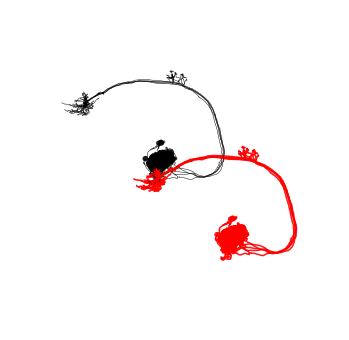

In [26]:
fig, ax = navis.plot2d(xf_fafb14, c='k')
_ = navis.plot2d(xf_fafb13, c='r', ax=ax, lw=1.5)
ax.azim = ax.elev = -90

In [30]:
# Construct template brain from base class
my_brain = navis.transforms.templates.TemplateBrain(name='My template brain',
                                                    label='my_brain',
                                                    boundingbox=[[0, 100], [0, 100], [0, 100]])

# Register with navis
navis.transforms.registry.register_templatebrain(my_brain)

# Now you can use it with mirror_brain:
import numpy as np
pts = np.array([[10, 10, 10]])
pts_mirrored = navis.mirror_brain(pts, template='my_brain')

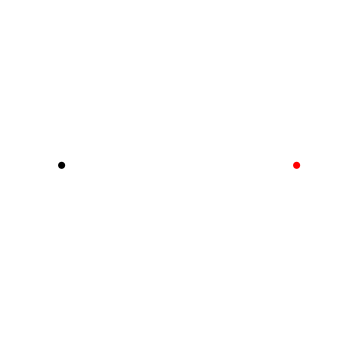

In [35]:
# Plot the points
fig, ax = navis.plot2d(pts, scatter_kws=dict(c='k', alpha=1, s=50))
fig, ax = navis.plot2d(pts_mirrored, scatter_kws=dict(c='r', alpha=1, s=50), ax=ax)